In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
import time

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from src.data_access.data_generation import DataGenerator
from src.data_access.folds_generation import FoldsGenerator
import src.config as global_config
import src.data_access.config as data_access_config
from src.data_access.utils import prepare_class_weighting

/home/ppeczek/anaconda3/envs/YetAnotherSegmentationExperiment/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ppeczek/anaconda3/envs/YetAnotherSegmentationExperiment/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ppeczek/anaconda3/envs/YetAnotherSegmentationExperiment/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = n

In [6]:
folds_genarator = FoldsGenerator(
    dataset_path=global_config.DATASET_PATH,
    generator_specs=data_access_config.FOLDS_GENERATOR_SPECS
)

In [7]:
dataset_split = next(folds_genarator.generate_folds())

In [8]:
training_set = dataset_split.training_set
test_set = dataset_split.test_set

In [9]:
training_generator = DataGenerator(
    examples=training_set.examples,
    transformation_chain=data_access_config.TRAINING_TRANSFORMATION_CHAIN,
    batch_size=64
)

In [10]:
class_weights = prepare_class_weighting(
    class_balance=training_set.classes_balance,
    class_mapping=global_config.CLASS_MAPPINGS
)

In [11]:
training_set.classes_balance

{'duck': 0.14534883720930233,
 'clamp': 0.16666666666666666,
 'adapter': 0.22286821705426357,
 'drill': 0.21705426356589147,
 'box': 0.09302325581395349,
 'bottle': 0.15503875968992248}

In [12]:
class_weights

{6: 0.1723363816134394,
 4: 0.15029336928403944,
 1: 0.11239331925278236,
 5: 0.11540385320291446,
 3: 0.2692754920614553,
 2: 0.16156536470990535,
 0: 0.018732219875463727}

In [13]:
training_generator.on_epoch_end()

In [14]:
for i in range(len(training_generator)):
    start_time = time.time()
    batch = training_generator[i]
    end_time = time.time()
    print(f"Batch generation time: {end_time-start_time}s")

Batch generation time: 1.12727952003479s
Batch generation time: 1.000680685043335s
Batch generation time: 1.0551352500915527s
Batch generation time: 1.0412654876708984s
Batch generation time: 0.99985671043396s
Batch generation time: 1.045151710510254s
Batch generation time: 1.0162692070007324s
Batch generation time: 1.0435612201690674s


In [15]:
X, y = batch[0], batch[1]
print(X.shape)
print(y.shape)

(64, 128, 128, 3)
(64, 128, 128, 7)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


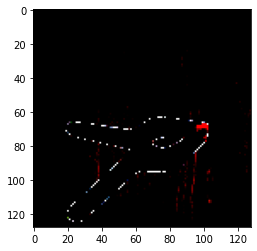

In [19]:
plt.imshow(X[2])

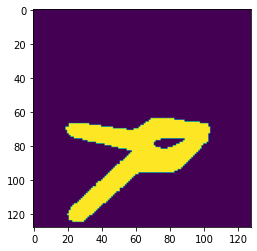

In [32]:
plt.imshow(y[2][:, :, 4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


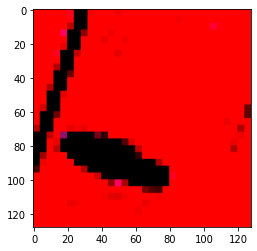

In [42]:
plt.imshow(X[10])

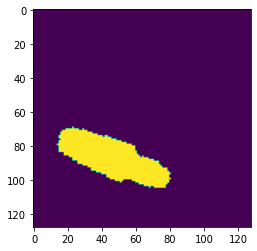

In [45]:
plt.imshow(y[10][:, :, 5])

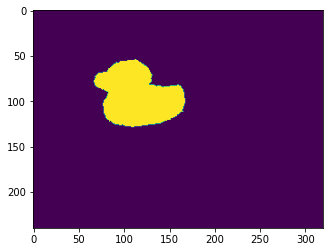

In [26]:
plt.imshow(y[11, :, :, 6])

In [65]:
np.max(y[11])

2